In [4]:
# 基本moduleのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 基本moduleの設定module
plt.rcParams['font.family'] = "MS Gothic"
plt.style.use("ggplot")
sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

In [5]:
# データの読み込み
train_df = pd.read_csv("processed/train_pr_2017.csv")
test_df = pd.read_csv("processed/test_pr_2017.csv")
submission_df = pd.read_csv("datasets/sample_submission.csv")

In [6]:
train_df

,id,date,family,onpromotion,month,day_of_week,day,is_holidays,oil_price,transactions,sales
0,2596935,2017-01-01,9,0,1,6,1,0,53.75,1642.0,5.000
1,2596936,2017-01-01,1,0,1,6,1,0,53.75,1642.0,2.000
2,2596937,2017-01-01,6,0,1,6,1,0,53.75,1642.0,3.000
3,2596938,2017-01-01,31,38,1,6,1,0,53.75,1642.0,4008.000
4,2596940,2017-01-01,27,3,1,6,1,0,53.75,1642.0,490.573
...,...,...,...,...,...,...,...,...,...,...,...
343471,3000883,2017-08-15,26,0,8,1,15,0,47.57,2155.0,438.133
343472,3000884,2017-08-15,19,1,8,1,15,0,47.57,2155.0,154.553
343473,3000885,2017-08-15,30,148,8,1,15,0,47.57,2155.0,2419.729
343474,3000886,2017-08-15,5,8,8,1,15,0,47.57,2155.0,121.000


In [7]:
test_df

,id,date,family,onpromotion,month,day_of_week,day,is_holidays,oil_price,transactions
0,3000888,2017-08-16,9,0,8,2,16,0,46.80,2111.0
1,3000889,2017-08-16,1,0,8,2,16,0,46.80,2111.0
2,3000890,2017-08-16,6,2,8,2,16,0,46.80,2111.0
3,3000891,2017-08-16,31,20,8,2,16,0,46.80,2111.0
4,3000892,2017-08-16,0,0,8,2,16,0,46.80,2111.0
...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,26,1,8,3,31,0,47.26,2940.0
28508,3029396,2017-08-31,19,0,8,3,31,0,47.26,2940.0
28509,3029397,2017-08-31,30,1,8,3,31,0,47.26,2940.0
28510,3029398,2017-08-31,5,9,8,3,31,0,47.26,2940.0


In [8]:
# 機械学習のmodule
import lightgbm as lgb

# 交差検証のmoduleのimport
from sklearn.model_selection import TimeSeriesSplit

# 精度指標
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# ハイパーパラメーターのサーチ用module
from sklearn.model_selection import RandomizedSearchCV

In [9]:
# 説明変数と目的変数に分割
y = train_df["sales"]

X  = train_df.drop(["id", "date", "sales"], axis=1)

X_test = test_df.drop(["id", "date"], axis=1)

In [15]:
# モデルのインスタンスを生成
model = lgb.LGBMRegressor(objective="regression", random_state=0)

# パラメーターの候補
params = {
    'num_leaves': [40, 60, 100],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'reg_alpha': [1, 2, 3],
    'reg_lambda': [0.1, 0.5, 1],
    'max_depth': [5, 10, 15]
}

In [16]:
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCVのパラメーターをmean_squared_errorにする
scoring = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

In [17]:
lightgbm = RandomizedSearchCV(model, param_distributions=params, scoring=scoring, cv=tscv)

In [18]:
lightgbm_search = lightgbm.fit(X, y)

c:\Users\yuuki\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\yuuki\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 57246, number of used features: 8
[LightGBM] [Info] Start training from score 585.358019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 114492, number of used features: 8
[LightGBM] [Info] Start training from score 572.233987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

In [19]:
best_param = lightgbm_search.best_params_
best_param

{'reg_lambda': 1,
 'reg_alpha': 2,
 'num_leaves': 100,
 'n_estimators': 1000,
 'max_depth': 5,
 'learning_rate': 0.01}

In [20]:
# modelを格納するリスト
models = []

# 検証用の予測結果を格納
y_valids = np.zeros((len(X),))

# lightgbmのscoreの保存
val_score = []

# X_testの予測を格納するリスト
preds = []

# bestなパラメーターを設定
params = {
    'objective': 'regression',
    'num_leaves': 100,
    'learning_rate': 0.01,
    'n_estimators': 1000,
    'reg_alpha': 2,
    'reg_lambda': 1,
    'max_depth': 5,
    'random_state': 0
}

# 交差検証
for train_index, val_index in tscv.split(train_df):
    X_train = train_df.iloc[train_index]
    X_val = train_df.iloc[val_index]

    y_train = X_train["sales"]
    X_train = X_train.drop(["id", "date", "sales"], axis=1)
    y_val = X_val["sales"]
    X_val = X_val.drop(["id", "date", "sales"], axis=1)

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='rmse')

     # 予測
    y_valid = model.predict(X_val)
    # 予測を格納
    y_valids[val_index] = model.predict(X_val)
    # スコア
    val_score.append(np.sqrt(mean_squared_error(y_val, y_valid)))

    # テスト用のデータの説明変数で結果を予測
    pred = model.predict(X_test)

    preds.append(pred)

    models.append(model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 57246, number of used features: 8
[LightGBM] [Info] Start training from score 585.358019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [21]:
pred_sales = pd.Series(y_valids, name="pred_sales")
valids_df = pd.concat([y, pred_sales], axis=1)
valids_df

,sales,pred_sales
0,5.000,0.000000
1,2.000,0.000000
2,3.000,0.000000
3,4008.000,0.000000
4,490.573,0.000000
...,...,...
343471,438.133,425.154495
343472,154.553,95.143050
343473,2419.729,2578.255319
343474,121.000,34.693883


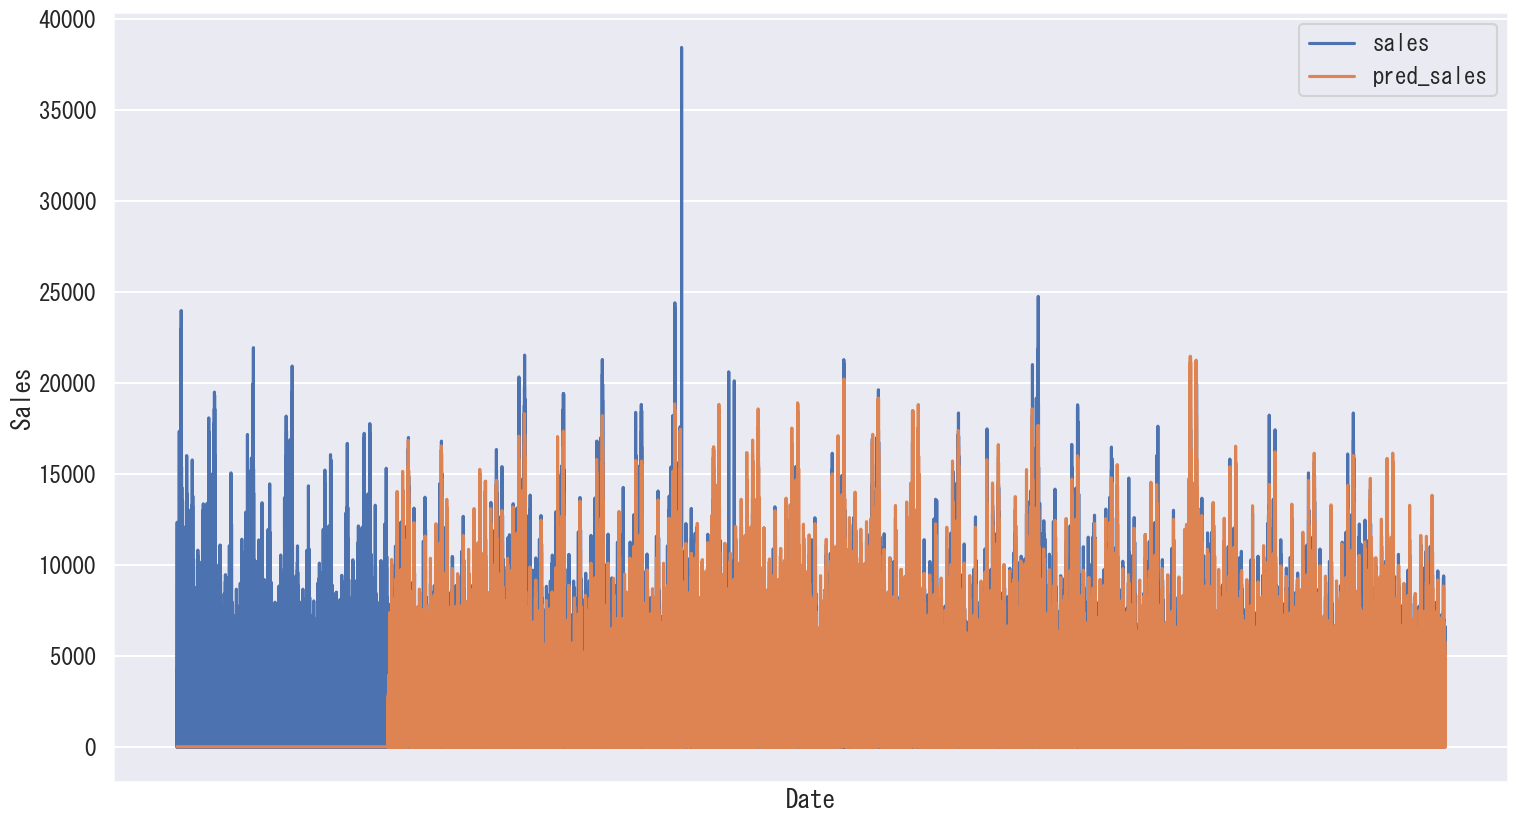

In [22]:
# 可視化
plt.figure(figsize=(18, 10))
sns.lineplot(valids_df, x=valids_df.index, y="sales", label="sales")
sns.lineplot(valids_df, x=valids_df.index, y="pred_sales", label="pred_sales")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.xticks([])
plt.legend()
plt.show()

In [28]:
preds

[array([   9.89570483,    6.56660382,   20.10895458, ..., 4280.62207525,
          53.18972575,   35.98944262]),
 array([  10.05677506,    7.00884839,   17.61289327, ..., 5008.34639459,
          56.28380037,   36.90060017]),
 array([   9.27459955,    7.14173015,   16.53715544, ..., 4977.32855912,
          62.51399228,   37.74323543]),
 array([5.49478432e+00, 2.57829654e+00, 7.39192141e+00, ...,
        4.42275259e+03, 4.67102067e+01, 3.17043462e+01]),
 array([5.66252878e+00, 2.76578739e+00, 8.20537084e+00, ...,
        4.55871579e+03, 4.19492716e+01, 3.29503745e+01])]

In [34]:
# 予想の平均
preds_mean = np.array(preds).mean(axis=0)

In [35]:
submission_pred = pd.Series(preds_mean, name="sales")
submission_pred

0           8.076879
1           5.212253
2          13.971259
3        3356.939973
4           5.212253
            ...     
28507     748.413529
28508     196.354831
28509    4649.553082
28510      52.129399
28511      35.057600
Name: sales, Length: 28512, dtype: float64

In [36]:
submission_id = submission_df["id"]
submission_id

0        3000888
1        3000889
2        3000890
3        3000891
4        3000892
          ...   
28507    3029395
28508    3029396
28509    3029397
28510    3029398
28511    3029399
Name: id, Length: 28512, dtype: int64

In [37]:
result_df = pd.concat([submission_id, submission_pred], axis=1)
result_df

,id,sales
0,3000888,8.076879
1,3000889,5.212253
2,3000890,13.971259
3,3000891,3356.939973
4,3000892,5.212253
...,...,...
28507,3029395,748.413529
28508,3029396,196.354831
28509,3029397,4649.553082
28510,3029398,52.129399


In [38]:
# 提出用のデータをmodelの名称やtimestampをつけて保存する
name = "lightgbm_tuning"

# タイムスタンプ用のmoduleをimport
import pytz
import datetime

# タイムスタンプを作成
now = datetime.datetime.now(pytz.timezone("Asia/Tokyo")).strftime("%Y-%m-%d-%H-%M-%S")

result_df.to_csv(f"submit_data/submission_{name}_{now}.csv", index=False)

### Kaggleに提出したが、520/716だった。
score = 1.24003
* lag特徴量の観察はできたが、それをmodelにどのように反映させたらよいのかわからなかった。  
* Kaggleのランカーたちのコードを見たが、時系列データに特別な処理をしていて、正直よくわからなかった。